In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath

from jwlab.cluster_analysis_perm import cluster_analysis_procedure
from jwlab.ml_prep_perm import prep_ml, slide_df, init, load_ml_data, get_bad_trials, map_participants,average_trials_and_participants
from jwlab.bad_trials import get_bad_trials, get_left_trial_each_word


from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


In [2]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_fold iterations, number of sample iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5])

Valid positive windows are: [7, 8, 9, 11, 12, 30, 44, 45, 46, 48, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 114, 115, 116, 117, 118, 119]

Valid negative windows are: [0, 1, 3, 4, 5, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 49, 50, 51, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]

Positive clusters are: [[-130, -120, -110], [240, 250, 260], [320, 330, 340, 350, 360], [380, 390, 400, 410, 420, 430, 440], [470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800], [940, 950, 960, 970, 980, 990]]

Negative clusters are: [[-170, -160, -150], [-70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50], [70, 80, 90], [110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]

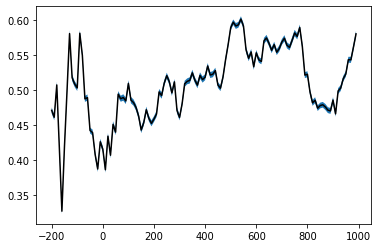

In [3]:
tmass = cluster_analysis_procedure(11, False, "permutation", [-200, 1000, [10], 10], [3, 15, 20])

Valid positive windows are: [29, 30, 31, 47, 54, 55, 56]

Valid negative windows are: [65, 66, 67, 69]

Positive clusters are: [[90, 100, 110], [340, 350, 360]]

Negative clusters are: [[450, 460, 470]]

Positive tmass values are: [0, inf, inf]

Negative tmass values are: [0, -inf]

The max positive t mass is: inf

The max negative t mass is: -inf

The max absolute t mass is: inf



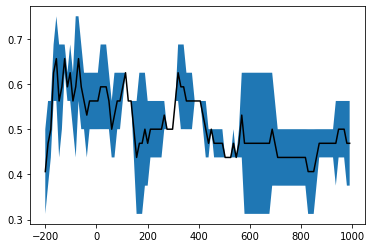

In [2]:
results = cluster_analysis_procedure(11, False, "average_trials_and_participants", [-200, 1000, [100], 10], [3, 15, 2])

In [ ]:
num_win= 120

pvalues_pos = []
pvalues_neg = []
tvalues_pos = []
tvalues_neg = []
for i in range(len(results)):
    for j in range(num_win):
        # change the second argument below for comparison
        istat = stats.ttest_1samp(results[i][j], .5)
        pvalues_pos += [istat.pvalue] if istat.statistic > 0 else [1]
        pvalues_neg += [istat.pvalue] if istat.statistic < 0 else [1]
        # removed just so that we can get the negative value from the pre window
        tvalues_pos += [istat.statistic] if istat.statistic > 0 else [0]
        tvalues_neg += [istat.statistic] if istat.statistic < 0 else [0]

In [2]:
# For null distribution
# MAKE SURE YOU TURN OFF PRINT FUNCTION

itr = 50 
arrTmass = []

for i in range(itr):
    tmass = cluster_analysis_procedure(11, True, "permutation", [-200, 1000, [10], 10], [3, 15, 20])
    arrTmass.append(round(tmass, 4))
    print(i)
print(arrTmass)

549.4334729161642
0


KeyboardInterrupt: 

In [ ]:


plt.hist(arrTmass, bins = 20)
plt.show()